# Handwritten Digit Recognition using an Artificial Neural Network

This project aims to build and train a neural network to recognize handwritten digits from the famous MNIST dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Data Loading and Exploration

First, let's load the MNIST dataset, which is conveniently included with Keras. It's already split into training and testing sets.

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#shape of our data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


The training data consists of 60,000 images, each being a 28x28 pixel grayscale image. Let's visualize one of them to see what we're working with.

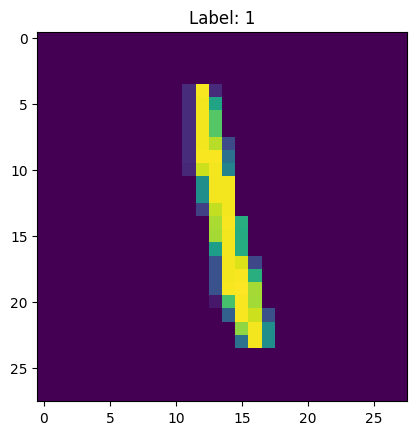

In [ ]:
# Displaying an example image
plt.imshow(X_train[104])
plt.title(f"Label: {y_train[104]}")
plt.show()

## 2. Data Preprocessing

The pixel values in the images range from 0 (black) to 255 (white). For a neural network to learn effectively, we should normalize these values. We'll scale them to a range between 0 and 1 by dividing by 255.

In [ ]:
#normalizing the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

## 3. Building the Artificial Neural Network (ANN)

neural network architecture.

1.  **Flatten Layer:** This will convert each 28x28 image into a 1D array of 784 pixels, which can be fed into our dense layers.
2.  **Hidden Layers:** We'll use two fully-connected (`Dense`) layers with the ReLU activation function to learn the patterns in the data.
3.  **Output Layer:** A final `Dense` layer with 10 neurons (one for each digit from 0-9) and a `softmax` activation function. Softmax will give us the probability distribution over the 10 classes.

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Model Training
we'll compile it with the Adam optimizer and `sparse_categorical_crossentropy` as our loss function, which is suitable for multi-class classification. Then, we'll train it on our data for 20 epochs.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training the model and storing the history
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8690 - loss: 0.4441 - val_accuracy: 0.9580 - val_loss: 0.1406
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9677 - loss: 0.1051 - val_accuracy: 0.9714 - val_loss: 0.0932
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9786 - loss: 0.0705 - val_accuracy: 0.9734 - val_loss: 0.0907
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9834 - loss: 0.0522 - val_accuracy: 0.9738 - val_loss: 0.0819
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9711 - val_loss: 0.0965
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0328 - val_accuracy: 0.9761 - val_loss: 0.0839
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9916 - loss: 0.0248 - val_accuracy: 0.9763 - val_loss: 0.0847
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0

## 5. Visualizing the Learning Process

We can plot the model's accuracy and loss over the training epochs to see how it learned. This helps us check for things like convergence and potential overfitting.


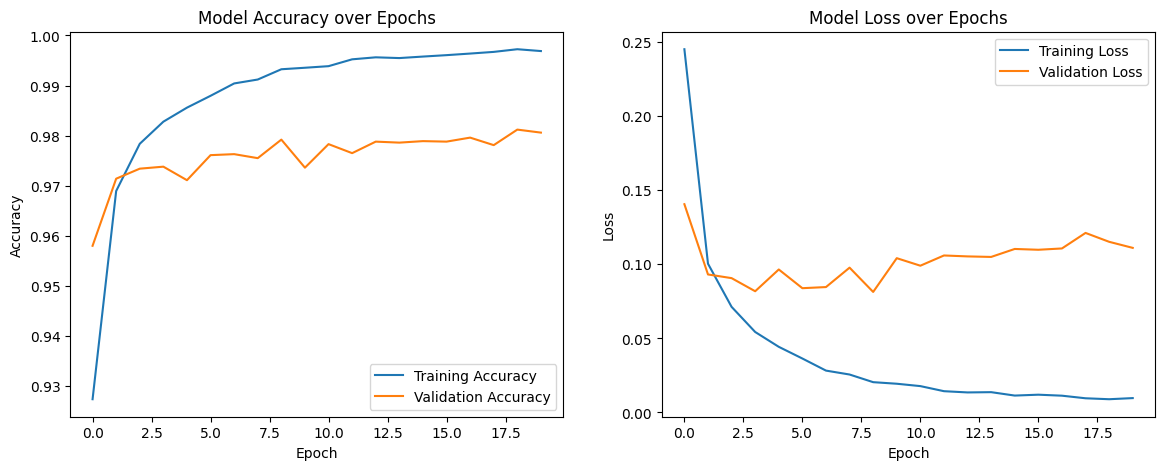

In [ ]:
plt.figure(figsize=(14, 5))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 6. Evaluating Performance:
the final predictions on the test set and calculate the overall accuracy.

In [ ]:
#making predictions on the test set
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

#calculating final accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Final Test Accuracy: 98.06%


An accuracy of ~98% is great, but it doesn't tell the full story. To truly understand our model's performance, let's look at a **confusion matrix**. This will show us exactly which digits the model is confusing with others.

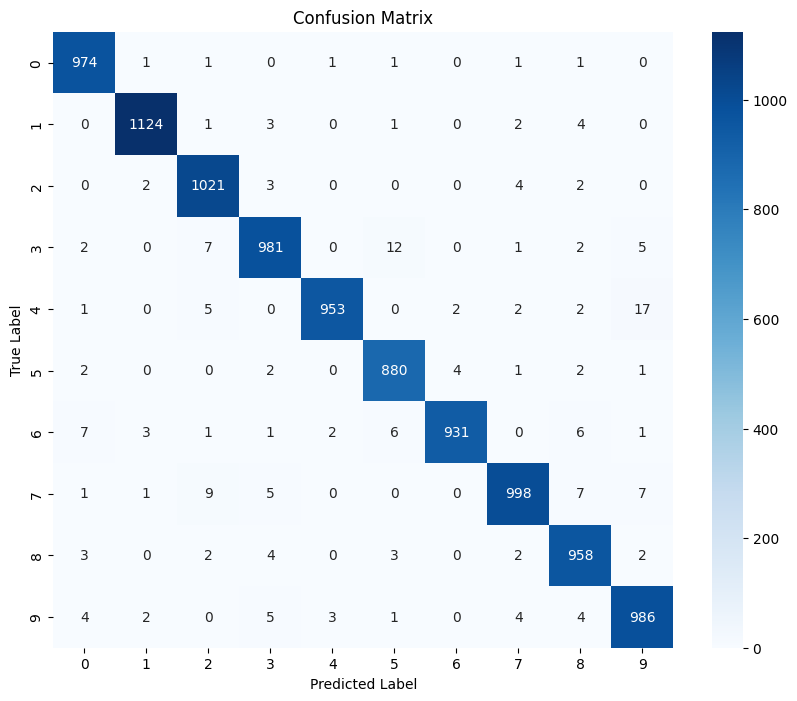

In [ ]:
#the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The diagonal shows the correctly classified digits. The off-diagonal cells show the errors. Let's visualize a few of the most common misclassifications to see what the model struggled with.

Examples of '9' being misclassified as '4':


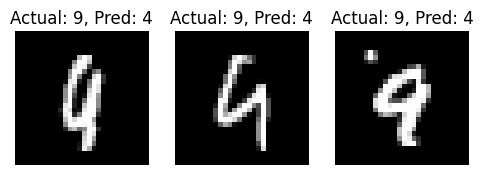

In [ ]:
#common misclassification
misclassified_indices = np.where((y_test == 9) & (y_pred == 4))[0]

print("Examples of '9' being misclassified as '4':")
plt.figure(figsize=(10, 2))
for i, index in enumerate(misclassified_indices[:5]): #5 examples
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Actual: 9, Pred: 4")
    plt.axis('off')
plt.show()

## 7. The Real-World Test: A Crucial Lesson



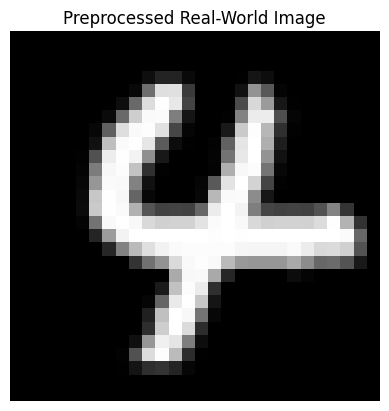

In [ ]:
from PIL import Image

image_path = 'four.png'
img = Image.open(image_path).convert('L') #convert to grayscale

#preprocessing the image
img = img.resize((28, 28))
img_array = np.array(img)

#normalize
img_array = img_array / 255.0

#reshape for the model
img_for_prediction = img_array.reshape(1, 28, 28)

#processed image
plt.imshow(img_for_prediction.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Real-World Image")
plt.axis('off')
plt.show()

In [ ]:
# Making a prediction on our real-world image
real_world_prediction_prob = model.predict(img_for_prediction)
predicted_digit = np.argmax(real_world_prediction_prob)

print(f"\nPredicted digit for the real-world image: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted digit for the real-world image: 4


## Conclusion
This project was a great success. We built an Artificial Neural Network that achieved an impressive 98.06% accuracy on the MNIST test set, demonstrating a strong ability to recognize handwritten digits.

The real test, however, was providing the model with an image it had never seen before—a handwritten '4' from an external source. After applying the same preprocessing steps, the model correctly identified the digit.

This successful prediction on a real-world image confirms that our model has generalized well beyond the training data and can be a practical tool for digit recognition. It's a fantastic demonstration of how a well-trained neural network can bridge the gap between curated datasets and real-world applications.